In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles



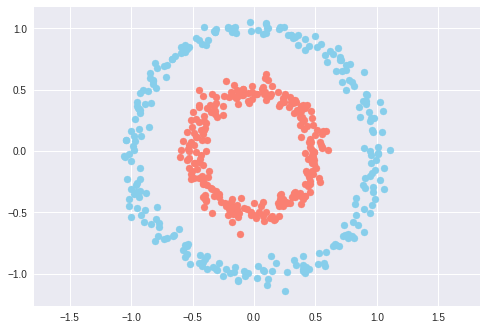

In [50]:
# creacion de dataset
n = 500 # cantidad de data
p = 2  # cantidad de caracteristicas de cada data
X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:,np.newaxis]

plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1],c="skyblue")
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1],c="salmon")
plt.axis("equal")
plt.show()


In [0]:
# clase de la capa de la red
class neural_layer():
  def __init__(self,n_conn,n_neur,act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1

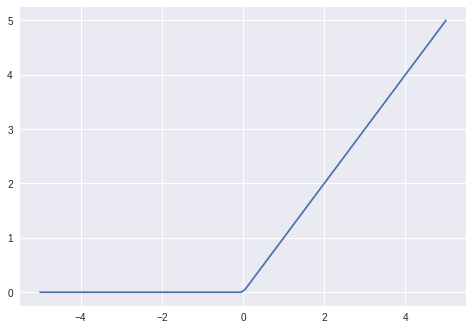

In [24]:
# funciones de activacion

# sigm[0] -> sigmoide, sigm[1] -> derivada de sigmoide
sigm = (lambda x: 1/(1+np.e ** (-x)),
        lambda x: x*(1-x))
 

relu = lambda x: np.maximum(0,x)


_x = np.linspace(-5,5,100)
plt.plot(_x, relu(_x))

In [27]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#...

# funcion que crea la red neuronal

def create_nn(topology, act_f):
  nn = []
  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn




  

In [0]:
topology = [p,4,8,1]
neural_net = create_nn(topology, sigm)

# funcion de coste (func, derivada)
l2_cost = (lambda Yp,Yr: np.mean((Yp-Yr)**2),
           lambda Yp,Yr: (Yp-Yr))
           
  

def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):
  
  out = [(None,X)] 
  
  # forward pass (adelante), vector de entrada capa x capa
  for l,layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z,a))
    
  print(l2_cost[0](out[-1][1],Y))
  
  if train: # backpropagation (entrenamiento)
    
    # backward pass
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) - 1:
        # ultima capa
        deltas.insert(0, l2_cost[1](a,Y)*neural_net[l].act_f[1](a))
        
      else:
        # capas interiores
        deltas.insert(0, deltas[0] @ _w.T*neural_net[l].act_f[1](a))
      _w = neural_net[l].w
    
      # gradient descent 
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True)*lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0]*lr
      
  return out[-1][1]
    


  train(neural_net,X,Y,l2_cost,0.5)


  
  

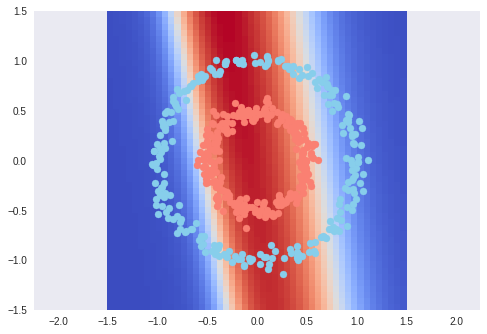

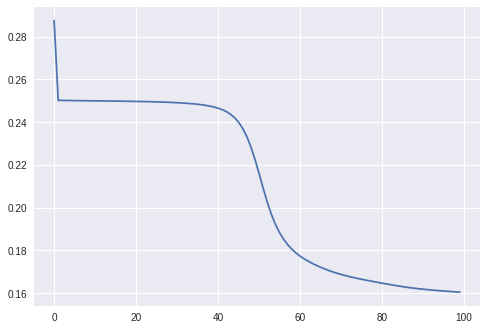

0.1604769066981409
0.16047147105484907
0.16046603999533451
0.1604606135049454
0.1604551915691717
0.16044977417364373
0.16044436130412976
0.16043895294653476
0.16043354908689839
0.16042814971139333
0.1604227548063237
0.16041736435812323
0.16041197835335372
0.16040659677870342
0.1604012196209855
0.16039584686713632
0.16039047850421406
0.16038511451939708
0.1603797548999825
0.16037439963338473
0.16036904870713406
0.1603637021088751
0.16035835982636537
0.16035302184747421


In [57]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  pY = train(neural_n, X, Y, l2_cost, lr=0.01)
  
  if i % 25 == 0:
    print(pY)
    
    loss.append(l2_cost[0](pY,Y))
    res = 50
    
    _x0 = np.linspace(-1.5,1.5,res)
    _x1 = np.linspace(-1.5,1.5,res)
    
    _Y = np.zeros((res,res))
    
    for i0,x0 in enumerate(_x0):
      for i1,x1 in enumerate(_x1):
        _Y[i0,i1] = train(neural_n, np.array([[x0,x1]]), Y, l2_cost, train=False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")
    
    plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0] == 0,1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0] == 1,1], c="salmon")
    
    clear_output(wait = False)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.5)